<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# Decision Tree - 의사결정나무

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1 Decision Tree

- Gini Index
- Entroy Index
- Information Gain

### 1.1 결정 트리 복잡도 제어 - Overfitting 방지

#### 1.1.1 max_depth 조절

In [2]:
# Visual Python: Machine Learning > Data Sets
from sklearn.datasets import load_breast_cancer

ldata = load_breast_cancer()
# Create DataFrame
df_ldata = pd.DataFrame(data=ldata.data, columns=ldata.feature_names)
df_ldata['target'] = ldata.target
df_ldata

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ldata[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness',
                                                              'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 
                                                              'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 
                                                              'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 
                                                              'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 
                                                              'worst concave points', 'worst symmetry', 'worst fractal dimension']],
                                                              df_ldata['target'])

In [4]:
# Visual Python: Machine Learning > Classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [5]:
# Visual Python: Machine Learning > Fit/Predict
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# Visual Python: Machine Learning > Model Info
scores = tree.score(X_train, y_train)
scores

1.0

In [7]:
# Visual Python: Machine Learning > Model Info
scores_test = tree.score(X_test, y_test)
scores_test

0.9370629370629371

#### max_depth = 4

In [8]:
# Visual Python: Machine Learning > Classifier
from sklearn.tree import DecisionTreeClassifier

tree_max4 = DecisionTreeClassifier(max_depth=4)

In [9]:
# Visual Python: Machine Learning > Fit/Predict
tree_max4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [10]:
# Visual Python: Machine Learning > Model Info
scores = tree_max4.score(X_train, y_train)
scores

0.9835680751173709

In [11]:
# Visual Python: Machine Learning > Model Info
scores_test = tree_max4.score(X_test, y_test)
scores_test

0.9370629370629371

### 1.3 결정 트리의 특성 중요도

#### Feature Importance - Tree 계열 모델에만 적용 가능
#### Permutation Feature Importance - 모든 모델에 적용 가능

In [12]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * (df_i['Feature_importance'] / df_i['Feature_importance'].max())
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i

In [13]:
# Visual Python: Machine Learning > Model Info
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

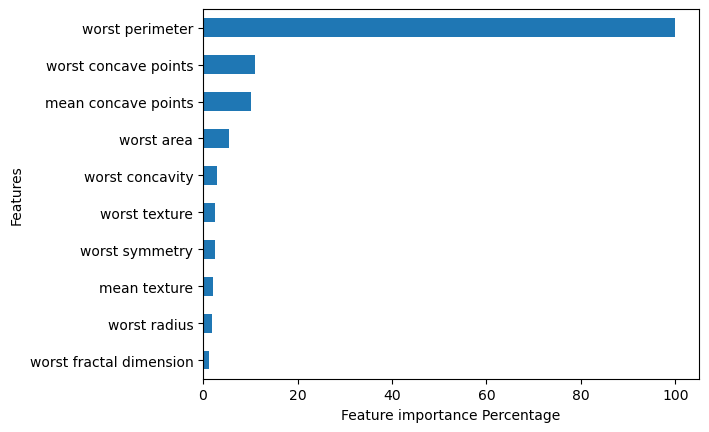

In [14]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(tree, X_train, sort=True, top_count=10)

---

In [15]:
# End of file